In [1]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from astropy.stats import biweight_location, biweight_scale, bootstrap
from astropy.cosmology import LambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
from scipy.interpolate import interp1d
import scipy.stats as stats
from astropy.stats import sigma_clip
c=const.c.to("km/s")
%matplotlib inline
cosmos = LambdaCDM(H0=67.77* u.km / u.Mpc / u.s, Om0=0.307115, Ode0=0.692885)  # define cosmology on the basis of simulation

In [40]:
#path_2_data = 'eromapper_cluster_zscan_kids_dr4.1_grz_z_0.05_0.85_vl0.2_i1_catalog.fit'
#path_2_data = 'eromapper_cluster_zscan_des_y1_mof_grz_z_0.05_0.85_vl0.2_i1_catalog.fit'
#path_2_data = 'eromapper_cluster_zscan_legacy_dr9_north_grzw1_w1_0.05_1.20_vl0.4_i1_catalog.fit'
path_2_data = 'eromapper_cluster_zscan_legacy_dr9_north_nopsf_grz_z_0.05_0.85_vl0.2_i1_catalog.fit'
print('opening', path_2_data)
my_file=astropy.io.fits.open(path_2_data)
print(my_file[1].data.columns)
data = my_file[1].data
print('data.field')

opening eromapper_cluster_zscan_legacy_dr9_north_nopsf_grz_z_0.05_0.85_vl0.2_i1_catalog.fit
ColDefs(
    name = 'id_cluster'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'z'; format = 'D'
    name = 'z_err'; format = 'D'
    name = 'zlit'; format = 'D'
    name = 'lamlit'; format = 'D'
    name = 'lamlit_e'; format = 'D'
    name = 'has_archival_redshift'; format = 'L'
    name = 'note'; format = '23A'
    name = 'ref'; format = '21A'
    name = 'select'; format = '7A'
    name = 'in_sptpolext'; format = 'L'
    name = 'in_spt2500'; format = 'L'
    name = 'in_sptpol100deg'; format = 'L'
    name = 'in_noras'; format = 'L'
    name = 'in_xclass'; format = 'L'
    name = 'in_mcxc'; format = 'L'
    name = 'in_wenhanlowzspecz'; format = 'L'
    name = 'in_wenhanhighzspecz'; format = 'L'
    name = 'in_actdr5'; format = 'L'
    name = 'in_psz2'; format = 'L'
    name = 'in_madcows'; format = 'L'
    name = 'in_gogreen_gclass'; format = 'L'
    name

In [70]:
data.field('id_cluster')

array([37736, 79758, 38520, ..., 22158, 87078, 69815])

In [71]:
id_clus=data.field('mem_match_id')

In [72]:
#array([24318,  3304,  1325, 74778,  2996, 90211, 88034, 33844,  1326,90211,88034,1326,33844,
       # 3113, 91268,  3049, 24132, 33847,  7042,  1253])

In [73]:
num=(data.field('n_members')) #
ma=np.where(num>130)
id_clus[ma]

array([24128, 24318,  3304, 23884, 73752,  1156,  3299,  1325, 74778,
        2996, 90211, 88034, 33844,  1326,  3113, 91268,  3049, 24132,
       33847,  7042,  1253])

(array([1958., 1961., 1497., 1324.,  761.,   84.,   39.,    8.,    3.,
           5.]),
 array([0.02444346, 0.13966793, 0.2548924 , 0.37011688, 0.48534135,
        0.60056583, 0.7157903 , 0.83101478, 0.94623925, 1.06146373,
        1.1766882 ]),
 <BarContainer object of 10 artists>)

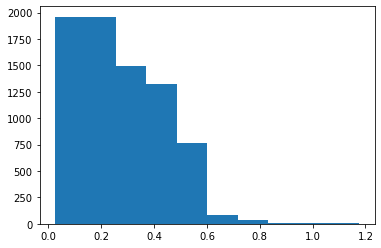

In [66]:
ra=data.field('ra')
dec=data.field('dec')
z=data.field('spec_z')
plt.hist(z)

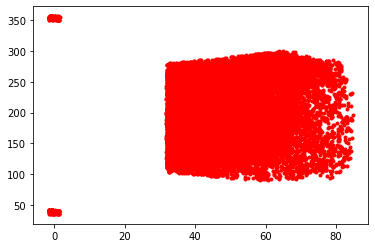

In [45]:
plt.plot(dec,ra,'.',color='r')

In [153]:
# From astropy inbuilt module separation
coordinates_SubHaloes = SkyCoord( Ra[mask1] , Dec[mask1] , unit='deg', frame='icrs')
coordinate_cluster    = SkyCoord( ra_cl , dec_cl, unit='deg', frame='icrs') 
Angular_separation_Astropy = coordinates_SubHaloes.separation( coordinate_cluster )
Angular_separation_Astropy_radian = (Angular_separation_Astropy).to(u.radian)

In [154]:
# Angular diameter distance
print('Angular diameter distance at the clusters redshift :' , cosmos.angular_diameter_distance(z_cl), 'per radian')
print('Angular diameter distance at the clusters redshift :' , cosmos.angular_diameter_distance(z_cl)/(180/np.pi), 'per degree')
print('Angular diameter distance at the clusters redshift :' , (cosmos.angular_diameter_distance(z_cl)/(180/np.pi)).to(u.kpc)/60, 'per arc minute    ')

Angular diameter distance at the clusters redshift : 1355.2689072212688 Mpc per radian
Angular diameter distance at the clusters redshift : 23.653904680916696 Mpc per degree
Angular diameter distance at the clusters redshift : 394.231744681945 kpc per arc minute    


In [155]:
# The angular separation between sub haloes and the cluster converted in Mpc
r_proj =  Angular_separation_Astropy_radian * cosmos.angular_diameter_distance(z_cl)/u.radian  # where D is comoving distance
print('min, max projected distance : ',r_proj.min(), r_proj.max()) #'compared to the 3D virial radius', r_cl/1000)

min, max projected distance :  0.07037302206642465 Mpc 1.9357844801579391 Mpc
